In [ ]:
%matplotlib qt

In [1]:
from __future__ import division
import numpy as np
from materials import vac, Al, GB
from microscope import Microscope
#from bulkMode import bulk_NR
#from twoSlabParallel import twoSlabParallel_NR, twoSlabParallel, twoSlabParallel_2, dispersion
from KrogerFormula import kroger
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, SymLogNorm

Initial varibales

In [2]:
c = 3E8 #[m/s]
hbar=6.582E-16#[eV s]

Set dimmensions

In [3]:
q_perpendicular = np.linspace(1E-3,20,200,endpoint=True)*1E6#np.arange(1E-3,200,1)*1E6#np.arange(1,1.5,1)*1E10#
E = np.arange(1,25,0.03)

q_perpendicular = q_perpendicular[:,np.newaxis]
E = E[np.newaxis,:]

In [4]:
print(q_perpendicular.shape)
print(E.shape)

(200, 1)
(1, 800)


Set materials

In [5]:
materials = [Al,GB()]#[vac,Al]#
for material in materials:
    print(material.name)
    print('n: ',material.n,'[e-/m^3]')
    material.set_Ep(type='Drude')
    print(material.E_p0)
    #material.set_eps(E=E,type='Drude')
    material.set_eps(E=E, q=q_perpendicular, type='Lindhard')
    print('')
#print(materials[1].eps.shape)
#materials[1].eps = np.ones_like(materials[1].eps)*(4+0j)
#print(materials[1].eps)

Al
n:  1.8117722802e+29 [e-/m^3]
Setting E_p
16.0492781587
Setting eps

GB
n:  1.68381104041e+29 [e-/m^3]
Setting E_p
15.4721395955
Setting eps



In [6]:
thickness = np.array([15])*1E-10#[400E-9, 160E-9]#
theta_n = [0, 45, 89]
q_z = [0, 100E6, 200E6]

Set microscope

In [7]:
microscope = Microscope(keV=300)
microscope.print_parameters()

Microscope
  keV :  300
  gamma :  1.5870841487279843
  beta2 :  0.6029912379261115
  v :  232957531.351
  T :  154304.780267
  k0 :  3.19429261034e+12
  resolution :  0.05
  dispersion :  0.05
  collection_angle :  0.002



# Plotting

dielectric funciton

In [ ]:
pos = 0
fig, ax = plt.subplots(1, figsize=(20,10))
ax.plot(E[0,pos:],np.real(materials[0].eps[1,pos:]), '-k', label='Al real')
ax.plot(E[0,pos:],np.imag(materials[0].eps[1,pos:]), '--k', label='Al imag')
ax.plot(E[0,pos:],np.real(materials[1].eps[1,pos:]), '-r', label='GB real')
ax.plot(E[0,pos:],np.imag(materials[1].eps[1,pos:]), '--r', label='GB imag')
ax.set_xlabel('E [eV]')
ax.set_ylabel(r'$\epsilon(E)$')
#ax.set_xlim(xmin=3)
#plt.autoscale(enable=True, axis='y', tight=True)
ax.legend()
plt.show()

In [ ]:
fig.savefig('C:/Users/erhog/Google Drive/Research/Simulations_electrodynamic/Kroger/AlGB_300keV/eps.jpg',
            transparent=True, bbox_inches='tight', dpi=800)

In [ ]:
epsSumReal = np.real(materials[0].eps[0,:])+np.real(materials[1].eps[0,:])
nearZero=(np.abs(epsSumReal)).argmin()

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,10))
ax.plot(E[0,pos:], np.imag(materials[0].eps[0,pos:])+np.imag(materials[1].eps[0,pos:]), label='imag')
ax.plot(E[0,pos:], np.real(materials[0].eps[0,pos:])+np.real(materials[1].eps[0,pos:]), label='real')
ax.plot([E[0,nearZero]],[epsSumReal[nearZero]],'ok')
ax.text(E[0,nearZero]+0.07,epsSumReal[nearZero],'({:0.3f}, {:0.3f})'.format(E[0,nearZero],epsSumReal[nearZero]))
ax.set_xlabel('E [eV]')
ax.set_ylabel(r'$\epsilon_{Al}+\epsilon_{vac}$')
ax.legend()
plt.show()

In [ ]:
fig.savefig('C:/Users/erhog/Google Drive/Research/Simulations_electrodynamic/Kroger/AlGB_300keV/epsSum.jpg',
            transparent=True, bbox_inches='tight', dpi=800)

Kroger

In [8]:
norm = None#LogNorm()

In [ ]:
def plot_together():
    fig, [[ax1, ax5], [ax2, ax6], [ax3, ax7], [ax4, ax8]] = plt.subplots(4, 2, figsize=(20,10))
    #fig.suptitle(r't: {:.2f}[nm],  $\theta_n$: {}$^o$'.format(t/1E-9,theta_n))
    
    img1 = ax1.imshow(interface_TM, aspect='auto', origin='lower', norm=norm, cmap=plt.get_cmap('hot'),
                     extent=(np.amin(E),np.amax(E), np.amin(q_perpendicular), np.amax(q_perpendicular)))
    plt.xlabel('E [eV]')
    plt.ylabel(r'$q_{y} [m^-]$')
    fig.colorbar(img1, ax=ax1)
    
    img2 = ax2.imshow(guidedLight1_TM, aspect='auto', origin='lower', norm=norm, cmap=plt.get_cmap('hot'),
                     extent=(np.amin(E),np.amax(E), np.amin(q_perpendicular), np.amax(q_perpendicular)))
    plt.xlabel('E [eV]')
    plt.ylabel(r'$q_{y} [m^-]$')
    fig.colorbar(img2, ax=ax2)
    
    img3 = ax3.imshow(guidedLight2_TM, aspect='auto', origin='lower', norm=norm, cmap=plt.get_cmap('hot'),
                     extent=(np.amin(E),np.amax(E), np.amin(q_perpendicular), np.amax(q_perpendicular)))
    plt.xlabel('E [eV]')
    plt.ylabel(r'$q_{y} [m^-]$')
    fig.colorbar(img3, ax=ax3)

    img4 = ax4.imshow(bulk1+bulk2, aspect='auto', origin='lower', norm=norm, cmap=plt.get_cmap('hot'),
                     extent=(np.amin(E),np.amax(E), np.amin(q_perpendicular), np.amax(q_perpendicular)))
    plt.xlabel('E [eV]')
    plt.ylabel(r'$q_{y} [m^-]$')
    fig.colorbar(img4, ax=ax4)

    img5 = ax5.imshow(interface_TE, aspect='auto', origin='lower', norm=norm, cmap=plt.get_cmap('hot'),
                     extent=(np.amin(E),np.amax(E), np.amin(q_perpendicular), np.amax(q_perpendicular)))
    plt.xlabel('E [eV]')
    plt.ylabel(r'$q_{y} [m^-]$')
    fig.colorbar(img5, ax=ax5)
    
    img6 = ax6.imshow(guidedLight1_TE, aspect='auto', origin='lower', norm=norm, cmap=plt.get_cmap('hot'),
                     extent=(np.amin(E),np.amax(E), np.amin(q_perpendicular), np.amax(q_perpendicular)))
    plt.xlabel('E [eV]')
    plt.ylabel(r'$q_{y} [m^-]$')
    fig.colorbar(img6, ax=ax6)
    
    img7 = ax7.imshow(guidedLight2_TE, aspect='auto', origin='lower', norm=norm, cmap=plt.get_cmap('hot'),
                     extent=(np.amin(E),np.amax(E), np.amin(q_perpendicular), np.amax(q_perpendicular)))
    plt.xlabel('E [eV]')
    plt.ylabel(r'$q_{y} [m^-]$')
    fig.colorbar(img7, ax=ax7)
    
    img8 = ax8.imshow(bulk1+bulk2+interface_TM+guidedLight1_TM+guidedLight2_TM+
                      interface_TE+guidedLight1_TE+guidedLight2_TE,
                      aspect='auto', origin='lower', norm=norm, cmap=plt.get_cmap('hot'),
                     extent=(np.amin(E),np.amax(E), np.amin(q_perpendicular), np.amax(q_perpendicular)))
    plt.xlabel('E [eV]')
    plt.ylabel(r'$q_{y} [m^-]$')
    fig.colorbar(img8, ax=ax8)
    
    #plt.show()
    return fig

In [ ]:
def plot_binned():
    total = bulk1+bulk2+interface_TM+guidedLight1_TM+guidedLight2_TM+interface_TE+guidedLight1_TE+guidedLight2_TE
    
    fig, [ax1,ax2] = plt.subplots(2, figsize=(20,10), sharex=True)
    #fig.suptitle(r'pos: {} [m]'.format(x[pos_index,0,0]))
    img0 = ax1.imshow(total,
                        aspect='auto', origin='lower', norm=norm, cmap=plt.get_cmap('hot'),
                 extent=(np.amin(E),np.amax(E), np.amin(q_perpendicular), np.amax(q_perpendicular)))
    #ax[0].set_title('Total')
    ax1.set_ylabel(r'$q_{y} [m^-]$')
    #fig.colorbar(mappable=img0, ax=ax[0])
    ax1.set_aspect('auto')

    #total[np.isnan(total)] = np.inf
    ax2.plot(E[0], total.sum(axis=0))
    ax2.set_xlim(xmin=0)
    plt.autoscale(enable=True, axis='x', tight=True)
    ax2.set_xlabel('E [eV]')
    plt.tight_layout(pad=0.001)
    return fig

In [ ]:
def plot_binned_convolve(fwhm=0.6):
    zlp = fwhm/(2*np.pi) * 1/(np.arange(-5,5,0.03)**2 + (fwhm/2)**2)
    total = bulk1+bulk2+interface_TM+guidedLight1_TM+guidedLight2_TM+interface_TE+guidedLight1_TE+guidedLight2_TE
    total = np.array([np.convolve(zlp,i,mode='same') for i in total])
    
    fig, [ax1,ax2] = plt.subplots(2, figsize=(20,10), sharex=True)
    #fig.suptitle(r'pos: {} [m]'.format(x[pos_index,0,0]))
    img0 = ax1.imshow(total,
                        aspect='auto', origin='lower', norm=norm, cmap=plt.get_cmap('hot'),
                 extent=(np.amin(E),np.amax(E), np.amin(q_perpendicular), np.amax(q_perpendicular)))
    #ax[0].set_title('Total')
    ax1.set_ylabel(r'$q_{y} [m^-]$')
    #fig.colorbar(mappable=img0, ax=ax[0])
    ax1.set_aspect('auto')

    #total[np.isnan(total)] = np.inf
    ax2.plot(E[0], total.sum(axis=0))
    ax2.set_xlim(xmin=0)
    plt.autoscale(enable=True, axis='x', tight=True)
    ax2.set_xlabel('E [eV]')
    plt.tight_layout(pad=0.001)
    return fig

In [ ]:
for t in thickness:
    for angle in theta_n:
        for qz in q_z:
            file_name = 'C:/Users/erhog/Google Drive/Research/Simulations_electrodynamic/Kroger/AlGB_300keV/{:.2f}nm{}degree_qz{:.2f}'.format(t/1E-9,angle,qz/1E6)
            file_end = '_E1E-3to30eV_q-200to200um.jpg'
            bulk1, bulk2, interface_TM, guidedLight1_TM, guidedLight2_TM, interface_TE, guidedLight1_TE, guidedLight2_TE = \
            kroger(microscope, material=materials, t=t, theta_n=angle, q_y=q_perpendicular, q_z=qz, E=E)

            fig = plot_together()
            #plt.show()

            fig.savefig(file_name+'parts'+file_end,
                        bbox_inches='tight', dpi=800)
            plt.close()

            fig = plot_binned()
            fig.savefig(file_name+'binned'+file_end,
                        bbox_inches='tight', dpi=800)
            plt.close()
            
            fig = plot_binned_convolve(fwhm=0.6)
            fig.savefig(file_name+'binnedConvolved'+file_end,
                        bbox_inches='tight', dpi=800)
            plt.close()

            fig, ax = plt.subplots(1, figsize=(20,10), sharex=True)
            img0 = ax.imshow(bulk1+bulk2+interface_TM+guidedLight1_TM+guidedLight2_TM+interface_TE+guidedLight1_TE+guidedLight2_TE,
                                aspect='auto', origin='lower', norm=LogNorm(), cmap=plt.get_cmap('hot'),
                         extent=(np.amin(E),np.amax(E), np.amin(q_perpendicular), np.amax(q_perpendicular)))
            ax.set_ylabel(r'$q_{y} [m^-]$')
            #fig.colorbar(mappable=img0, ax=ax[0])
            ax.set_aspect('auto')
            plt.tight_layout(pad=0.001)
            fig.savefig(file_name+'total'+file_end,
                        bbox_inches='tight', dpi=800)

            plt.close()

In [13]:
norm = LogNorm()#SymLogNorm(1E-10)

In [9]:
def plot_interface():
    fig, ax1 = plt.subplots(1, 1, figsize=(20,10))
    #fig.suptitle(r't: {:.2f}[nm],  $\theta_n$: {}$^o$'.format(t/1E-9,theta_n))
    
    img1 = ax1.pcolor(E, q_perpendicular/1E6,
                      interface_TM+guidedLight1_TM+guidedLight2_TM+
                      interface_TE+guidedLight1_TE+guidedLight2_TE,
                      norm=norm, cmap=plt.get_cmap('hot'))
    plt.xlabel('E [eV]')
    plt.ylabel(r'$q_{y}\ [\mu m^-]$')
    fig.colorbar(img1, ax=ax1)
    
    return fig

In [ ]:
def plot_interface_binned():
    fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(20,10), sharex=True)
    #fig.suptitle(r't: {:.2f}[nm],  $\theta_n$: {}$^o$'.format(t/1E-9,theta_n))
    
    img1 = ax1.pcolor(E, q_perpendicular/1E6,
                      interface_TM+guidedLight1_TM+guidedLight2_TM+
                      interface_TE+guidedLight1_TE+guidedLight2_TE,
                      norm=norm, cmap=plt.get_cmap('hot'))
    ax1.set_ylabel(r'$q_{y}\ [\mu m^-]$')
#    fig.colorbar(img1, ax=ax1)

    ax2.plot(E[0], (interface_TM+guidedLight1_TM+guidedLight2_TM+
                      interface_TE+guidedLight1_TE+guidedLight2_TE).sum(axis=0))
    ax2.set_xlim(xmin=0)
    plt.autoscale(enable=True, axis='x', tight=True)
    ax2.set_xlabel('E [eV]')
    plt.tight_layout(pad=0.001)
    
    return fig

In [10]:
t=thickness[0]
t_total = 45E-10
angle=theta_n[0]
qz = 1E6

file_name = 'C:/Users/erhog/Google Drive/Research/Simulations_electrodynamic/Kroger/AlGB_300keV/{:.2f}nm{}degree_qz{:.2f}'.format(t/1E-9,angle,qz/1E6)
file_end = '_E1E-3to30eV_q0to200um.jpg'

In [11]:
bulk1, bulk2, interface_TM, guidedLight1_TM, guidedLight2_TM, interface_TE, guidedLight1_TE, guidedLight2_TE = \
        kroger(microscope, material=materials, t=t, t_total=t_total, theta_n=angle, q_y=q_perpendicular, q_z=qz, E=E)

C:\Users\erhog\Documents\GitHub\Interface_Plasmon_Simulation\Interface_Plasmon_Simulation\KrogerFormula.py:104: RuntimeWarning: overflow encountered in tanh
  L_s = q_parallel1*eps2 + q_parallel2*eps1 * np.tanh(q_parallel2*t/2)
C:\Users\erhog\Documents\GitHub\Interface_Plasmon_Simulation\Interface_Plasmon_Simulation\KrogerFormula.py:105: RuntimeWarning: overflow encountered in tanh
  L_as = q_parallel1*eps2 + q_parallel2*eps1 * 1/np.tanh(q_parallel2*t/2)
C:\Users\erhog\Documents\GitHub\Interface_Plasmon_Simulation\Interface_Plasmon_Simulation\KrogerFormula.py:106: RuntimeWarning: overflow encountered in tanh
  M_s = q_parallel1 + q_parallel2 * np.tanh(q_parallel2*t/2)
C:\Users\erhog\Documents\GitHub\Interface_Plasmon_Simulation\Interface_Plasmon_Simulation\KrogerFormula.py:107: RuntimeWarning: overflow encountered in tanh
  M_as = q_parallel1 + q_parallel2 / np.tanh(q_parallel2*t/2)
C:\Users\erhog\Documents\GitHub\Interface_Plasmon_Simulation\Interface_Plasmon_Simulation\KrogerFormula.

In [15]:
print(q_perpendicular.shape)
print(E.shape)
print(bulk1.shape)

(200, 1)
(1, 800)
(200, 800)


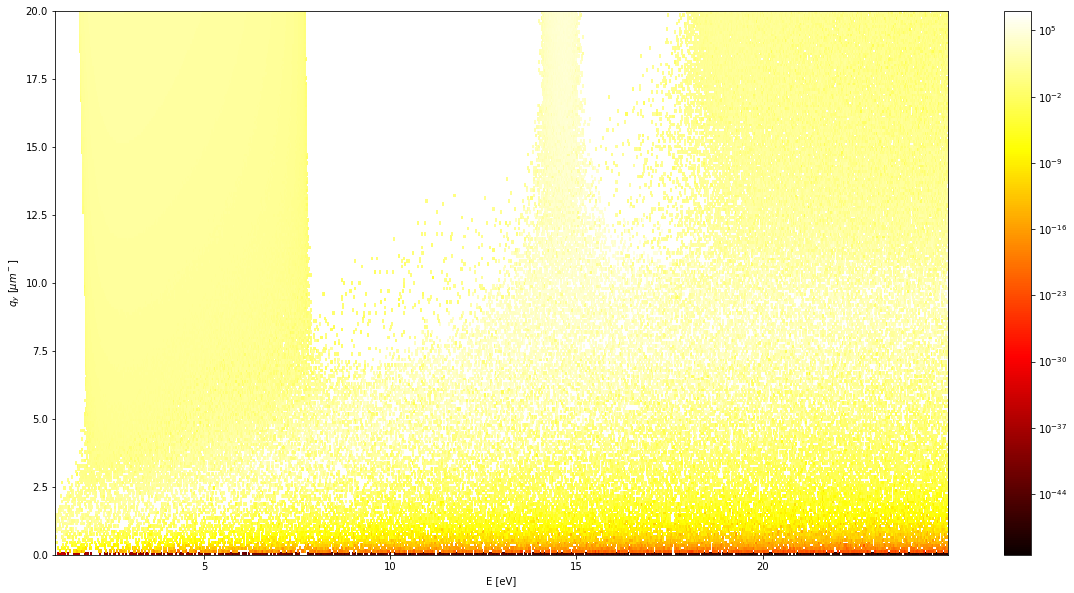

In [14]:
fig = plot_interface()
plt.show()

In [ ]:
fig.savefig(file_name+'Interface'+file_end,
                        bbox_inches='tight', dpi=800)

In [ ]:
fig = plot_interface_binned()
plt.show()

In [ ]:
fig.savefig(file_name+'Interface_binned'+file_end,
                        bbox_inches='tight', dpi=800)

In [ ]:
fig = plot_binned()
plt.show()

In [ ]:
fig = plot_together()
plt.show()

In [ ]:
fig = plot_binned_convolve()
plt.show()